In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax
%matplotlib notebook

In [3]:
class SimpleBanditAgent:
    """Epsilon greedy agent"""
    def __init__(self, k=10, epsilon=0.1):
        self.Q = np.zeros([k])
        self.N = np.zeros([k])
        self.epsilon = epsilon
        self.reward = np.array([])
        self.k = k
        
    def update(self, action, reward):
        self.N[action] += 1
        self.Q[action] += (reward - self.Q[action]) / self.N[action]
        self.reward = np.append(self.reward, np.array(reward))
        
    def choose_action(self):
        if np.random.uniform() < self.epsilon:
            return np.random.randint(self.k)
        else:
            return np.argmax(self.Q)
        
    def reset(self):
        self.reward = np.array([])
        self.Q = np.zeros([self.k])
        self.N = np.zeros([self.k])

In [4]:
class UCBAgent:
    """Upper confidece bound agent"""
    def __init__(self, k=10, epsilon=0.1, c=2):
        self.Q = np.zeros([k])
        self.N = np.zeros([k])
        self.reward = np.array([])
        self.k = k
        self.c = c
        
    def update(self, action, reward):
        self.N[action] += 1
        self.Q[action] += (reward - self.Q[action]) / self.N[action]
        self.reward = np.append(self.reward, np.array(reward))

    def choose_action(self):
        return np.argmax(self.Q + self.c * np.sqrt(np.log(np.sum(self.N))/self.N))
    
    def reset(self):
        self.reward = np.array([])
        self.Q = np.zeros([self.k])
        self.N = np.zeros([self.k])


In [5]:
class GradientBandit:
    """Gradient based bandit"""
    def __init__(self, k=10, alpha=0.1):
        self.H = np.zeros([k])
        self.avg_reward = 0
        self.alpha = alpha
        self.reward = np.array([])
        self.N = 0
        self.k = k
        
    def update(self, action, reward):
        self.N += 1
        self.avg_reward += (reward - self.avg_reward) / self.N
        for k in range(self.k):
            if k == action:
                self.H[k] += self.alpha * (reward - self.avg_reward) * (1 - softmax(self.H[k]))
            else:
                self.H[k] -= self.alpha * (reward - self.avg_reward) * softmax(self.H[k])
        self.reward = np.append(self.reward, np.array(reward))
    
    def choose_action(self):
        return np.argmax(softmax(self.H))
    
    def reset(self):
        self.H = np.zeros([self.k])
        self.avg_reward = 0
        self.reward = np.array([])
        self.N = 0

In [8]:
class MultiArmedBandit:
    """Multi armed bandits environment"""
    def __init__(self, k=10):
        self.means = np.random.normal(size=k)
    def execute(self, action):
        return np.random.normal(loc=self.means[action], scale=1)
    def get_optimal_action(self):
        return np.argmax(self.means)

In [9]:
agent1 = SimpleBanditAgent(epsilon=0.1)
agent2 = SimpleBanditAgent(epsilon=0.01)
agent3 = SimpleBanditAgent(epsilon=0)
agent4 = UCBAgent()
agent5 = GradientBandit()

In [10]:
# 10 Armed Bandit test suite
steps = 1500
total_rewards_agent1 = np.zeros([steps]) 
total_rewards_agent2 = np.zeros([steps]) 
total_rewards_agent3 = np.zeros([steps]) 
total_rewards_agent4 = np.zeros([steps])
total_rewards_agent5 = np.zeros([steps])
for i in range(100):
    problem = MultiArmedBandit()
    for i in range(steps):
        action = agent1.choose_action()
        reward = problem.execute(action)
        agent1.update(action, reward)
        action = agent2.choose_action()
        reward = problem.execute(action)
        agent2.update(action, reward)
        action = agent3.choose_action()
        reward = problem.execute(action)
        agent3.update(action, reward)
        action = agent4.choose_action()
        reward = problem.execute(action)
        agent4.update(action, reward)
        action = agent5.choose_action()
        reward = problem.execute(action)
        agent5.update(action, reward)
    total_rewards_agent1 = np.add(total_rewards_agent1, agent1.reward)
    total_rewards_agent2 = np.add(total_rewards_agent2, agent2.reward)
    total_rewards_agent3 = np.add(total_rewards_agent3, agent3.reward)
    total_rewards_agent4 = np.add(total_rewards_agent4, agent4.reward)
    total_rewards_agent5 = np.add(total_rewards_agent5, agent5.reward)
    agent1.reset()
    agent2.reset()
    agent3.reset()
    agent4.reset()
    agent5.reset()

/Users/eliasmasquil/.virtualenvs/basic-rl/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/Users/eliasmasquil/.virtualenvs/basic-rl/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()
/Users/eliasmasquil/.virtualenvs/basic-rl/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/Users/eliasmasquil/.virtualenvs/basic-rl/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


<IPython.core.display.Javascript object>


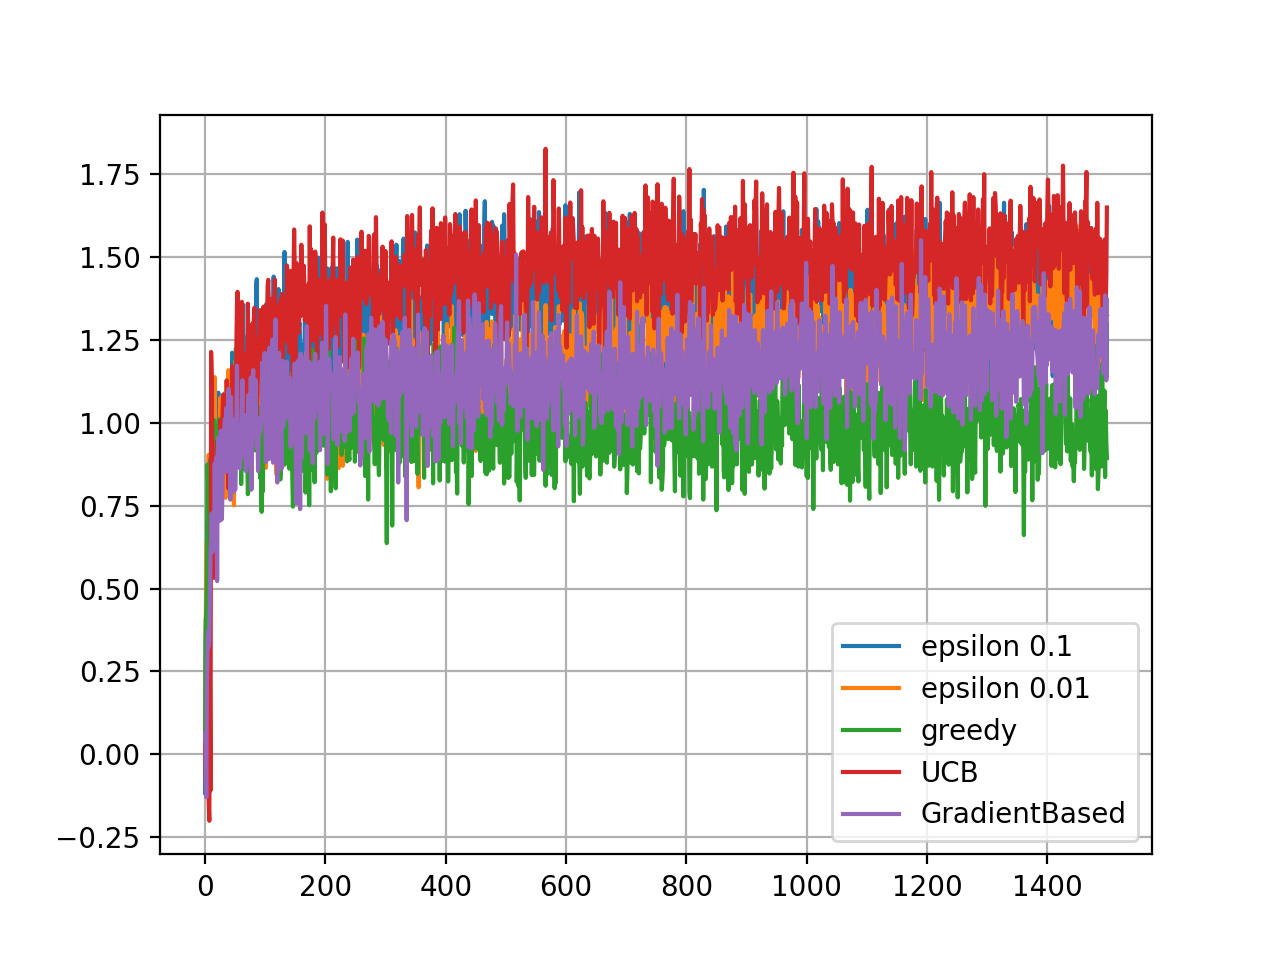

In [11]:
experiments = 100
plt.figure()
plt.plot(total_rewards_agent1/experiments)
plt.plot(total_rewards_agent2/experiments)
plt.plot(total_rewards_agent3/experiments)
plt.plot(total_rewards_agent4/experiments)
plt.plot(total_rewards_agent5/experiments)
plt.grid()
plt.legend(['epsilon 0.1', 'epsilon 0.01', 'greedy', 'UCB', 'GradientBased'])